In [2]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import time
import saveGif

time.perf_counter()
start = time.time()

# set parameters
n_samples = 10000
n_step = 10000
# 在（0，0）生成黑洞
# 在以（0，0）为圆心，r=sqrt(n_samples)的圆盘内生成均匀的点

# genarte data

# initial condition
r = np.random.uniform(0, 10000, n_samples)
theta = np.random.uniform(0, 2*np.pi, n_samples)
x = r*np.cos(theta)
y = r*np.sin(theta)
vx = np.random.normal(size=n_samples)*5
vy = np.random.normal(size=n_samples)*5

# random walk
x_rand = []
y_rand = []
print("Genarating data>>>")
for i in tqdm(range(n_step)):
    x_rand.append(np.random.random(n_samples) *
                  np.cos(np.random.uniform(0, 2*np.pi, n_samples)))
    y_rand.append(np.random.random(n_samples) *
                  np.sin(np.random.uniform(0, 2*np.pi, n_samples)))

# caculate
print("Caculating>>>")
n = 0
for step in tqdm(range(n_step)):
    r2 = x**2 + y**2
    F = 100000/ r2**1.5
    ax = -F * x
    ay = -F * y
    vx += ax
    vy += ay
    x += x_rand[step] + vx
    y += y_rand[step] + vy
'''
    if (step % 50 == 0):
        plt.figure(figsize=(10,10))
        plt.plot([0],[0], 'ro', markersize=5)
        plt.plot(x, y, 'bo', markersize=3, alpha=0.2)
        plt.xlim(-n_samples , n_samples )
        plt.ylim(-n_samples , n_samples )
        plt.savefig('./fig/%d.png' % n)
        plt.cla()
        plt.close()
        n = n+1
'''

end = time.time()
elapse = end - start
print('total time: ' + str(elapse))
#saveGif.main(n)

  1%|          | 81/10000 [00:00<00:12, 809.95it/s]

Genarating data>>>


  2%|▏         | 162/10000 [00:00<00:06, 1616.33it/s]

Caculating>>>


100%|██████████| 10000/10000 [00:06<00:00, 1660.32it/s]

total time: 17.916637897491455


In [3]:
#Save gif
import imageio


def create_gif(image_list, gif_name):

    frames = []
    for image_name in image_list:
        frames.append(imageio.imread(image_name))
    # Save them as frames into a gif
    imageio.mimsave(gif_name, frames, 'GIF', duration=0.005)
    print("Complete !")
    return


def main(n):
    image_list = []
    for i in range(n):
        image_list.append('./fig/'+str(i) + '.png')
    gif_name = 'created_gif'
    create_gif(image_list, gif_name)


if __name__ == "__main__":
    main(n)

RuntimeError: Zero images were written.

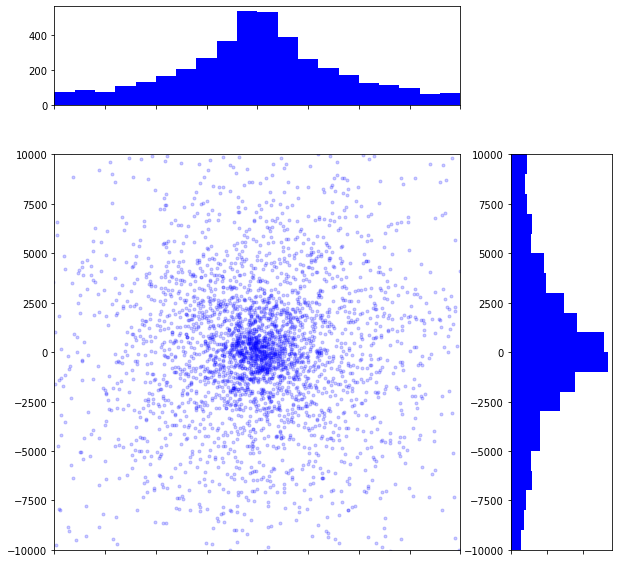

In [4]:
plt.figure(figsize=(10, 10))
grid = plt.GridSpec(4, 4, wspace=0.5, hspace=0.5)

main_ax = plt.subplot(grid[1:4, 0:3])
plt.plot(x, y, 'bo', markersize=3, alpha=0.2)
plt.xlim(-n_samples, n_samples)
plt.ylim(-n_samples, n_samples)

y_hist = plt.subplot(grid[1:4, 3], xticklabels=[], sharey=main_ax)
plt.hist(y, 20, range=(-n_samples, n_samples), orientation='horizontal', color='blue')

x_hist = plt.subplot(grid[0, 0:3], xticklabels=[], sharex=main_ax)
plt.hist(x, 20, range=(-n_samples, n_samples), orientation='vertical', color='blue')

plt.show()

In [19]:
v = (vx**2+vy**2)/2

In [20]:
data = np.concatenate([x.reshape(-1,1),y.reshape(-1,1),v.reshape(-1,1)], axis=1)

In [21]:
mask1 = abs(data[:,0])<1500
DATA = data[mask1]

mask2 = abs(DATA[:,1])<1500
DATA = DATA[mask2]

mask = (data[:,0]**2+data[:,1]**2<100000)

xi = DATA[:,0]
yi = DATA[:,1]
zi = DATA[:,2]

In [22]:
DATA

array([[ -207.80186968,   150.48796727,   387.73381903],
       [-1457.40703425,   853.04974788,    23.36432407],
       [  -42.45876253,  -358.98196416,   183.7407812 ],
       ...,
       [ -251.34722028,   -11.64215939,   169.09860432],
       [  463.55084976,  -590.48506357,    33.23836353],
       [ -308.93817607,   178.91233522,   121.64753559]])

In [23]:
import matplotlib.tri as tri 
triang = tri.Triangulation(xi, yi)
interpolator = tri.LinearTriInterpolator(triang, zi)
X, Y = np.meshgrid(xi, yi)
Z = interpolator(X, Y)

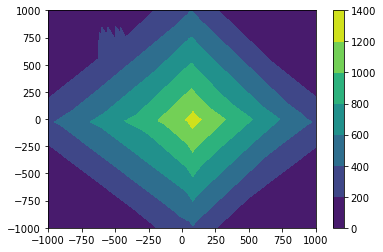

In [24]:
fig, ax = plt.subplots(1)
#fig.figure(figsize=(10,6))
#填充颜色，f即filled
#plt.contourf(X,Y,Z)
#画等高线
cntr = ax.contourf(X,Y,Z)
fig.colorbar(cntr, ax=ax)
plt.xlim(-1000,1000)
plt.ylim(-1000,1000)
plt.show()

In [28]:
from scipy.interpolate import griddata

In [60]:
mask = (data[:,0]**2+data[:,1]**2<1000000)
DATA = data[mask]

In [61]:
DATA

array([[-207.80186968,  150.48796727,  387.73381903],
       [ -42.45876253, -358.98196416,  183.7407812 ],
       [-101.45529102,  477.75954755,  181.68183683],
       ...,
       [-251.34722028,  -11.64215939,  169.09860432],
       [ 463.55084976, -590.48506357,   33.23836353],
       [-308.93817607,  178.91233522,  121.64753559]])

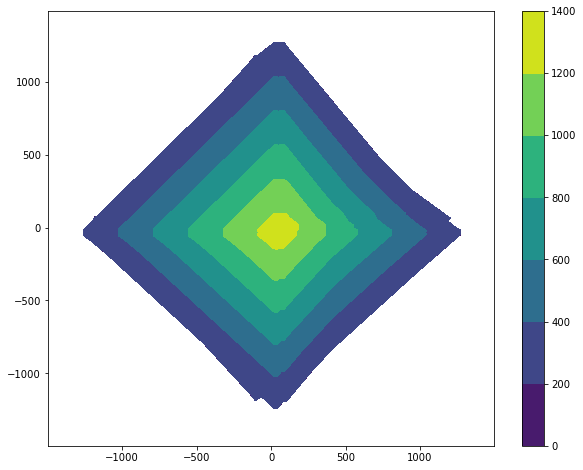

In [83]:
mask = (data[:,0]**2+data[:,1]**2<1000000)
DATA = data[mask]
grid_z0 = griddata((DATA[:,0],DATA[:,1]), DATA[:,2], (X, Y), method='nearest')
fig, ax = plt.subplots(1, figsize=(10,8))
cntr = ax.contourf(X,Y,grid_z0)
fig.colorbar(cntr, ax=ax)
#plt.xlim(-1000,1000)
#plt.ylim(-1000,1000)
plt.show()